# Figure. Power Analysis

In [1]:
import copy
import os
import subprocess

import cdpybio as cpb
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import ciepy
import cardipspy as cpy

%matplotlib inline
%load_ext rpy2.ipython

dy_name = 'figure_power_analysis'
    
outdir = os.path.join(ciepy.root, 'output', dy_name)
cpy.makedir(outdir)

private_outdir = os.path.join(ciepy.root, 'private_output', dy_name)
cpy.makedir(private_outdir)

In [2]:
fn = os.path.join(ciepy.root, 'output', 'gtex_analysis', 'plot_data.tsv')
plotd = pd.read_table(fn, index_col=0)

In [4]:
sns.set_style('whitegrid')

In [ ]:
fig,axs = plt.subplots(1, 2, figsize=(7.5, 3.75))
ax = axs[0]
ax.scatter(gtex_info.num_samples, gtex_info.num_sig_genes, label='GTEx', 
            color=cpb.analysis.tableau20[0], s=100, alpha=0.75)
ax.scatter([131, rna_meta.in_eqtl.sum()], 
           [len(set(unr_sig.gene_id)), len(set(sig.gene_id))], label='iPSC', 
            color=cpb.analysis.tableau20[2], alpha=0.75, s=100)
ax.scatter([373], [len(set(geuvadis.GENE_ID))], label='LCL', color=cpb.analysis.tableau20[4],
            alpha=0.75, s=100)

ax.set_xlabel('Number of samples')
ax.set_ylabel('Number of eGenes')


ax = axs[1]
ax.scatter(gtex_info.num_samples, gtex_info.num_distinct_egenes / gtex_info.num_sig_genes.astype(float), 
            label='GTEx', color=cpb.analysis.tableau20[0], s=60, alpha=0.75)
ax.scatter([131, rna_meta.in_eqtl.sum()], 
           [(len(set(unr_sig.gene_id) - gtex_sig_genes)) / float(len(set(unr_sig.gene_id))),
            (len(set(sig.gene_id) - gtex_sig_genes)) / float(len(set(sig.gene_id)))], 
            label='iPSC', color=cpb.analysis.tableau20[2], alpha=0.75, s=60)
ax.scatter([373], [len(set(geuvadis.ens_gene_id) - set([x.split('.')[0] for x in gtex_sig_genes])) / 
                    float(len(set(geuvadis.ens_gene_id)))],
            label='LCL', color=cpb.analysis.tableau20[4],
            alpha=0.75, s=60)
ymin,ymax = ax.get_ylim()
ax.set_ylim(0, ymax)

ax.set_xlabel('Number of samples')
ax.set_ylabel('Percent eGenes not in GTex')
ax.legend(frameon=True, fancybox=True)
fig.tight_layout()
plt.savefig(os.path.join(outdir, 'egenes_samples_and_distinct.pdf'));

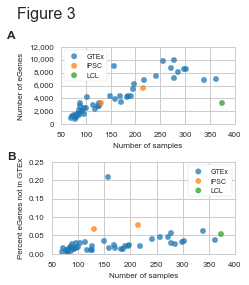

In [31]:
fig = plt.figure(figsize=(3.425, 4), dpi=300)

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.text(0, 0, 'Figure 3',
        size=16, va='bottom')
ciepy.clean_axis(ax)
ax.set_xticks([])
ax.set_yticks([])
gs.tight_layout(fig, rect=[0, 0.90, 0.5, 1])

# Number of eGenes vs. number of samples
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(plotd.ix[plotd.source == 'gtex', 'num_samples'], 
           plotd.ix[plotd.source == 'gtex', 'num_sig_genes'],
           label='GTEx', color=cpb.analysis.tableau20[0], s=30, alpha=0.75)
ax.scatter(plotd.ix[plotd.source == 'cardips', 'num_samples'], 
           plotd.ix[plotd.source == 'cardips', 'num_sig_genes'],
           label='iPSC', color=cpb.analysis.tableau20[2], alpha=0.75, s=30)
ax.scatter(plotd.ix[plotd.source == 'geuvadis', 'num_samples'], 
           plotd.ix[plotd.source == 'geuvadis', 'num_sig_genes'],
           label='LCL', color=cpb.analysis.tableau20[4], alpha=0.75, s=30)
ax.set_xlabel('Number of samples', fontsize=8)
ax.set_ylabel('Number of eGenes', fontsize=8)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
ax.legend(frameon=True, fancybox=True, fontsize=7, loc='upper left')
ax.yaxis.set_major_formatter(ciepy.comma_format)
gs.tight_layout(fig, rect=[0, 0.45, 1, 0.9])

# Percent distinct eGenes
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(plotd.ix[plotd.source == 'gtex', 'num_samples'], 
           plotd.ix[plotd.source == 'gtex', 'percent_distinct_egenes'],
           label='GTEx', color=cpb.analysis.tableau20[0], s=30, alpha=0.75)
ax.scatter(plotd.ix[plotd.source == 'cardips', 'num_samples'], 
           plotd.ix[plotd.source == 'cardips', 'percent_distinct_egenes'],
           label='iPSC', color=cpb.analysis.tableau20[2], alpha=0.75, s=30)
ax.scatter(plotd.ix[plotd.source == 'geuvadis', 'num_samples'], 
           plotd.ix[plotd.source == 'geuvadis', 'percent_distinct_egenes'],
           label='LCL', color=cpb.analysis.tableau20[4], alpha=0.75, s=30)
ax.set_xlabel('Number of samples', fontsize=8)
ax.set_ylabel('Percent eGenes not in GTEx', fontsize=8)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
ax.legend(frameon=True, fancybox=True, fontsize=7, loc='upper right')
ymin,ymax = ax.get_ylim()
ax.set_ylim(0, ymax)
gs.tight_layout(fig, rect=[0, 0, 1, 0.5])

t = fig.text(0.005, 0.88, 'A', weight='bold', 
             size=12)
t = fig.text(0.005, 0.46, 'B', weight='bold', 
             size=12)

fig.savefig(os.path.join(outdir, 'power.pdf'))

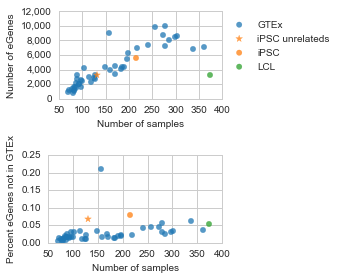

In [65]:
fs = 10

fig = plt.figure(figsize=(6.8, 4), dpi=300)

# Number of eGenes vs. number of samples
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(plotd.ix[plotd.source == 'gtex', 'num_samples'], 
           plotd.ix[plotd.source == 'gtex', 'num_sig_genes'],
           label='GTEx', color=cpb.analysis.tableau20[0], s=30, alpha=0.75)
ax.scatter([plotd.ix['ipsc_unrelateds', 'num_samples']], 
           [plotd.ix['ipsc_unrelateds', 'num_sig_genes']],
           label='iPSC unrelateds', color=cpb.analysis.tableau20[2], alpha=0.75, s=50,
           marker='*')
ax.scatter([plotd.ix['ipsc', 'num_samples']], 
           [plotd.ix['ipsc', 'num_sig_genes']],
           label='iPSC', color=cpb.analysis.tableau20[2], alpha=0.75, s=30)
ax.scatter(plotd.ix[plotd.source == 'geuvadis', 'num_samples'], 
           plotd.ix[plotd.source == 'geuvadis', 'num_sig_genes'],
           label='LCL', color=cpb.analysis.tableau20[4], alpha=0.75, s=30)
ax.set_xlabel('Number of samples', fontsize=fs)
ax.set_ylabel('Number of eGenes', fontsize=fs)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(fs)
lgd = ax.legend(loc='upper center', bbox_to_anchor=(1.35, 1))
ax.yaxis.set_major_formatter(ciepy.comma_format)
gs.tight_layout(fig, rect=[0, 0.5, 0.5, 1])

# Percent distinct eGenes
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(plotd.ix[plotd.source == 'gtex', 'num_samples'], 
           plotd.ix[plotd.source == 'gtex', 'percent_distinct_egenes'],
           label='GTEx', color=cpb.analysis.tableau20[0], s=30, alpha=0.75)
ax.scatter([plotd.ix['ipsc_unrelateds', 'num_samples']], 
           [plotd.ix['ipsc_unrelateds', 'percent_distinct_egenes']],
           label='iPSC', color=cpb.analysis.tableau20[2], alpha=0.75, s=50,
           marker='*')
ax.scatter([plotd.ix['ipsc', 'num_samples']], 
           [plotd.ix['ipsc', 'percent_distinct_egenes']],
           label='iPSC unrelateds', color=cpb.analysis.tableau20[2], alpha=0.75, s=30)
ax.scatter(plotd.ix[plotd.source == 'geuvadis', 'num_samples'], 
           plotd.ix[plotd.source == 'geuvadis', 'percent_distinct_egenes'],
           label='LCL', color=cpb.analysis.tableau20[4], alpha=0.75, s=30)
ax.set_xlabel('Number of samples', fontsize=fs)
ax.set_ylabel('Percent eGenes not in GTEx', fontsize=fs)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(fs)
#ax.legend(frameon=True, fancybox=True, fontsize=fs, loc='upper right')
ymin,ymax = ax.get_ylim()
ax.set_ylim(0, ymax)
gs.tight_layout(fig, rect=[0, 0, 0.5, 0.5])

fig.savefig(os.path.join(outdir, 'power_presentation.pdf'))

In [46]:
ax.scatter?

In [43]:
plotd

num_samples  num_sig_genes    source  \
Testis                                         157           9009      gtex   
Thyroid                                        278           9937      gtex   
Nerve_Tibial                                   256           9860      gtex   
Whole_Blood                                    338           6784      gtex   
Cells_Transformed_fibroblasts                  272           8760      gtex   
Esophagus_Mucosa                               241           7416      gtex   
Skin_Sun_Exposed_Lower_leg                     302           8567      gtex   
Adipose_Subcutaneous                           298           8500      gtex   
Muscle_Skeletal                                361           7082      gtex   
Lung                                           278           7236      gtex   
Artery_Tibial                                  285           8056      gtex   
Esophagus_Muscularis                           218           6916      gtex   
Pancreas                                       149           4301      gtex   
Artery_Aorta                                   197           6220      gtex   
Brain_Cerebellum                               103           4163      gtex   
Skin_Not_Sun_Exposed_Suprapubic                196           5491      gtex   
Colon_Transverse                               169           4446      gtex   
Cells_EBV-transformed_lymphocytes              114           2955      gtex   
Heart_Left_Ventricle                           190           4417      gtex   
Brain_Cerebellar_Hemisphere                     89           3251      gtex   
Adrenal_Gland                                  126           3259      gtex   
Heart_Atrial_Appendage                         159           3929      gtex   
Adipose_Visceral_Omentum                       185           4301      gtex   
Stomach                                        170           3438      gtex   
Breast_Mammary_Tissue                          183           4140      gtex   
Liver                                           97           1628      gtex   
Brain_Caudate_basal_ganglia                    100           2447      gtex   
Spleen                                          89           2754      gtex   
Brain_Cortex                                    96           2567      gtex   
Pituitary                                       87           2160      gtex   
Brain_Nucleus_accumbens_basal_ganglia           93           2019      gtex   
Colon_Sigmoid                                  124           2882      gtex   
Ovary                                           85           1583      gtex   
Brain_Frontal_Cortex_BA9                        92           2009      gtex   
Esophagus_Gastroesophageal_Junction            127           2751      gtex   
Artery_Coronary                                118           2363      gtex   
Brain_Putamen_basal_ganglia                     82           1588      gtex   
Brain_Anterior_cingulate_cortex_BA24            72           1212      gtex   
Small_Intestine_Terminal_Ileum                  77           1356      gtex   
Brain_Hypothalamus                              81           1157      gtex   
Prostate                                        87           1462      gtex   
Brain_Hippocampus                               81           1134      gtex   
Vagina                                          79            840      gtex   
Uterus                                          70            917      gtex   
ipsc_unrelateds                                131           3310   cardips   
ipsc                                           215           5619   cardips   
lcl                                            373           3259  geuvadis   

                                       percent_distinct_egenes  
Testis                                                0.210345  
Thyroid                                               0.055449  
Nerve_Tibial                                       